# Homework 6: Revisit IMDB/Reuters/Boston housing datasets
- 기존에 진행한 IMDB, 로이터, 보스턴 하우징 데이터셋을 바탕으로 모델을 변형시켜 새로운 결과를 내보자

# IMDB Dataset : Binary Classification problem

### 1. Load the Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb

top_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=top_words)

In [3]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

number of train data : 25000
number of test data : 25000


### 2. EDA (Exploratory Data Analysis)

In [4]:
len_result = [len(s) for s in train_data]

print('Max length of the review : {}'.format(np.max(len_result)))
print('Average length of the review : {}'.format(np.mean(len_result)))

Max length of the review : 2494
Average length of the review : 238.71364


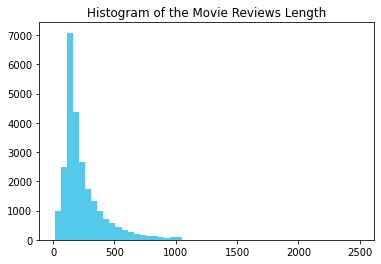

In [5]:
plt.title('Histogram of the Movie Reviews Length')
plt.hist(len_result, bins=50, color='#54CAEA')
plt.show()

# 리뷰마다 길이가 다르며, 길면 2000자가 넘는 경우도 있다. 
# 그러나 평균적으로는 200자에 가까우며, 대부분의 리뷰는 500자 이내임을 알 수 있다.

In [6]:
negative, positive = np.unique(train_labels, return_counts=True)

# 레이블링이 되어있으면 긍정 리뷰 데이터(1), 안 되어있으면 부정 리뷰 데이터(0)이다.

print("Number of Negative/Positive Reviews:")
print(np.asarray((negative, positive)))

# train data 의 긍정 리뷰 데이터와 부정 리뷰 데이터의 개수는 각 12,500개로 동일하다.

Number of Negative/Positive Reviews:
[[    0     1]
 [12500 12500]]


### 3. One-Hot Encoding

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


## Experiment using 'LSTM'
LSTM 은 RNN 기반의 모델으로, RNN 보다 성능이 좋다. 숨겨진 노드에 추가로 들어오는 정보를 계속 흐를 수 있게 하는 기능을 추가해 시간이 오래 흘러도 학습 능력을 유지할 수 있다는 장점을 가지고 있다.
- activation function: sigmoid
- optimizer: Adam
- loss function: binary_crossentropy
- batch size: 64
- epoch: 5

In [22]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import models
from keras import layers

#### 데이터 불러오기

In [23]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


#### Pad sequences 

In [24]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


#### 모델 생성하기

In [25]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일하기

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 학습 시작하기

In [28]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/5
782/782 [==============================] - 89s 111ms/step - loss: 0.5205 - accuracy: 0.7193 - val_loss: 0.3671 - val_accuracy: 0.8397
Epoch 2/5
782/782 [==============================] - 97s 124ms/step - loss: 0.2592 - accuracy: 0.9005 - val_loss: 0.3717 - val_accuracy: 0.8359
Epoch 3/5
782/782 [==============================] - 92s 118ms/step - loss: 0.1701 - accuracy: 0.9365 - val_loss: 0.5289 - val_accuracy: 0.8188
Epoch 4/5
782/782 [==============================] - 92s 118ms/step - loss: 0.1147 - accuracy: 0.9580 - val_loss: 0.5457 - val_accuracy: 0.8222
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.6005 - accuracy: 0.8213


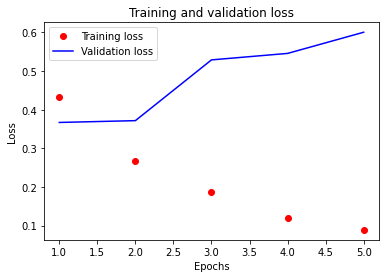

In [30]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6004639267921448
Test accuracy: 0.8213199973106384


### IMDB Result
이전 basic neural network 를 사용했을 때와 비교하면, LSTM 모델의 정확도는 82%, 기존 모델의 정확도는 87%로 LSTM 을 사용했을 때 정확도가 조금 더 떨어지는 모습을 보였다. 같은 자연어 데이터라고 해서 무조건 LSTM 이 성능이 좋게 나오는 것이 아니라는 것을 알 수 있었다. 또한 오버피팅 되는 모습을 보였다.

# Reuters Dataset : Multi-Classification problem

### 1. Load the Dataset

In [88]:
from keras.datasets import reuters

In [89]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000, test_split=0.2)

In [90]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

number of train data : 8982
number of test data : 2246


### 2. EDA (Exploratory Data Analysis)

In [91]:
len_result = [len(_) for _ in train_data]

print('Max length of the news article : {}'.format(np.max(len_result)))
print('Average length of the news article : {}'.format(np.mean(len_result)))

Max length of the news article : 2376
Average length of the news article : 145.5398574927633


/Users/lifeofpy/opt/anaconda3/envs/lifeofpy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


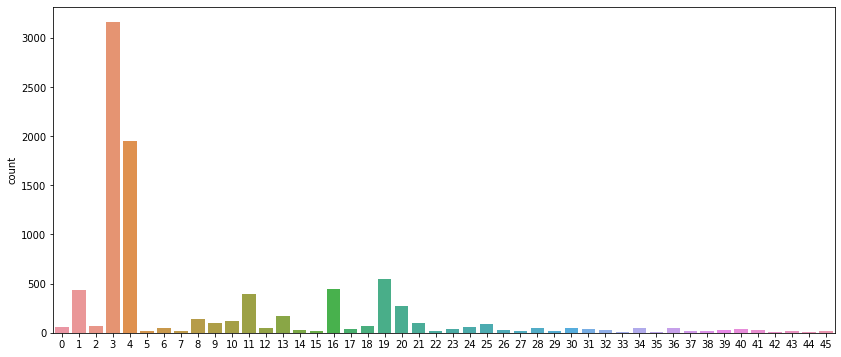

In [92]:
import seaborn as sns
fig, _ = plt.subplots(ncols=1)
fig.set_size_inches(14,6)
sns.countplot(train_labels)

# 전체 뉴스 기사 중에서 총 46개의 뉴스 카테고리 중 3번과 4번이 가장 많은 비중을 차지하고 있다.
# 따라서 카테고리별로 데이터가 불균형하다.

### 3. Pre-processing

In [93]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_val = vectorize_sequences(test_data)

In [94]:
from keras.utils.np_utils import to_categorical

# 레이블링된 카테고리를 원 핫 인코딩을 통해 벡터의 차원으로 표현한다.
y_train = to_categorical(train_labels)
y_val = to_categorical(test_labels)

## Experiment using 'Basic model + Dropout'
기본적인 neural network 에 Dropout 을 통해 오버피팅을 방지해보자.
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_crossentropy
- batch size: 32
- epoch: 15
- use dropout, rate=0.2

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [185]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(46, activation='softmax'))

In [186]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 64)                640064    
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['acc'])

In [188]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/50
36/36 [==============================] - 1s 17ms/step - loss: 1.0003 - acc: 0.2696 - val_loss: 0.9801 - val_acc: 0.5637
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 0.8912 - acc: 0.5477 - val_loss: 0.5889 - val_acc: 0.5873
Epoch 3/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5758 - acc: 0.5745 - val_loss: 0.5315 - val_acc: 0.6224
Epoch 4/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5233 - acc: 0.6023 - val_loss: 0.5250 - val_acc: 0.6541
Epoch 5/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5244 - acc: 0.6121 - val_loss: 0.5205 - val_acc: 0.6656
Epoch 6/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5025 - acc: 0.6335 - val_loss: 0.5171 - val_acc: 0.6719
Epoch 7/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4981 - acc: 0.6477 - val_loss: 0.5174 - val_acc: 0.6754
Epoch 8/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5042 - a

In [189]:
score, acc = model.evaluate(x_val, y_val, batch_size=batch_size)

71/71 [==============================] - 0s 1ms/step - loss: 0.4325 - acc: 0.7030


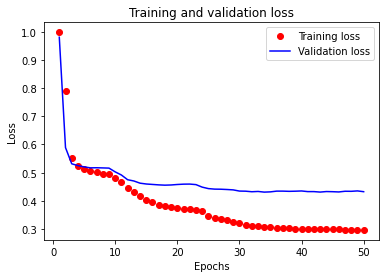

In [190]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [191]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.43253135681152344
Test accuracy: 0.703027606010437


### Reuters Result
이전 Basic neural network 를 사용했을 때와 비교하면, 가장 높은 정확도였던 78% 의 기존 basic 모델보다 dropout 을 사용했을 때 정확도가 더 낮았으나, validation loss 가 서서히 줄어드는 모습을 보였다.

# Boston Housing Dataset : Regression Problem

### 1. Load the Dataset

In [143]:
import pandas as pd
from keras.datasets import boston_housing

In [144]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [145]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

number of train data : 404
number of test data : 102


In [146]:
order = np.argsort(np.random.random(train_labels.shape)) 
train_data = train_data[order] 
train_labels = train_labels[order]

In [147]:
# train data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df1 = pd.DataFrame(train_data, columns=column_names) 
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
1,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41
2,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
3,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
4,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36


In [148]:
# test data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df2 = pd.DataFrame(test_data, columns=column_names) 
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [149]:
# train data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
prices = ['MEDV']
df3 = pd.DataFrame(train_labels, columns=prices)
df3.head()

,MEDV
0,22.6
1,17.3
2,14.4
3,39.8
4,31.6


In [150]:
# test data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
df4 = pd.DataFrame(test_labels, columns=prices)
df4.head()

,MEDV
0,7.2
1,18.8
2,19.0
3,27.0
4,22.2


### 2. EDA (Exploratory Data Analysis)

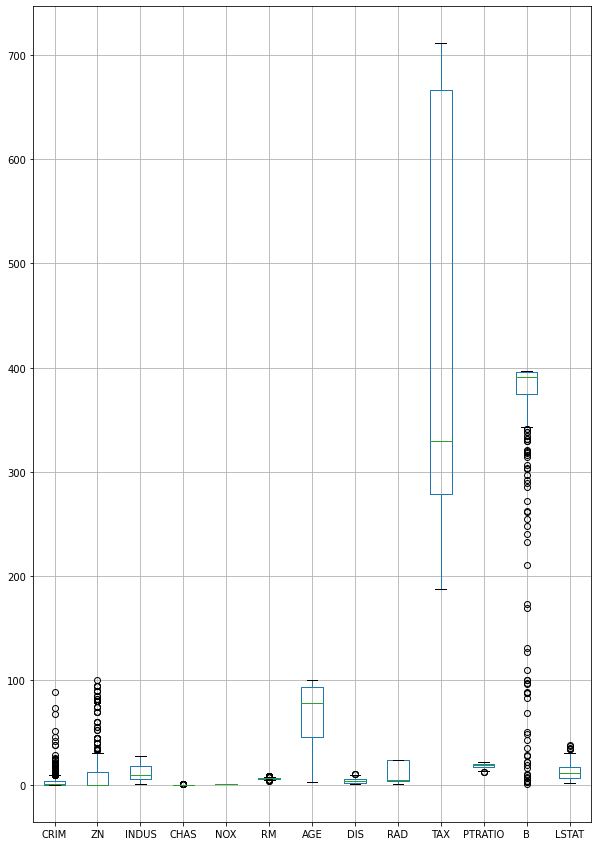

In [151]:
# boxplot 을 통해 13가지 요인들의 분포를 살펴본다.
df1.boxplot(figsize=(10,15))

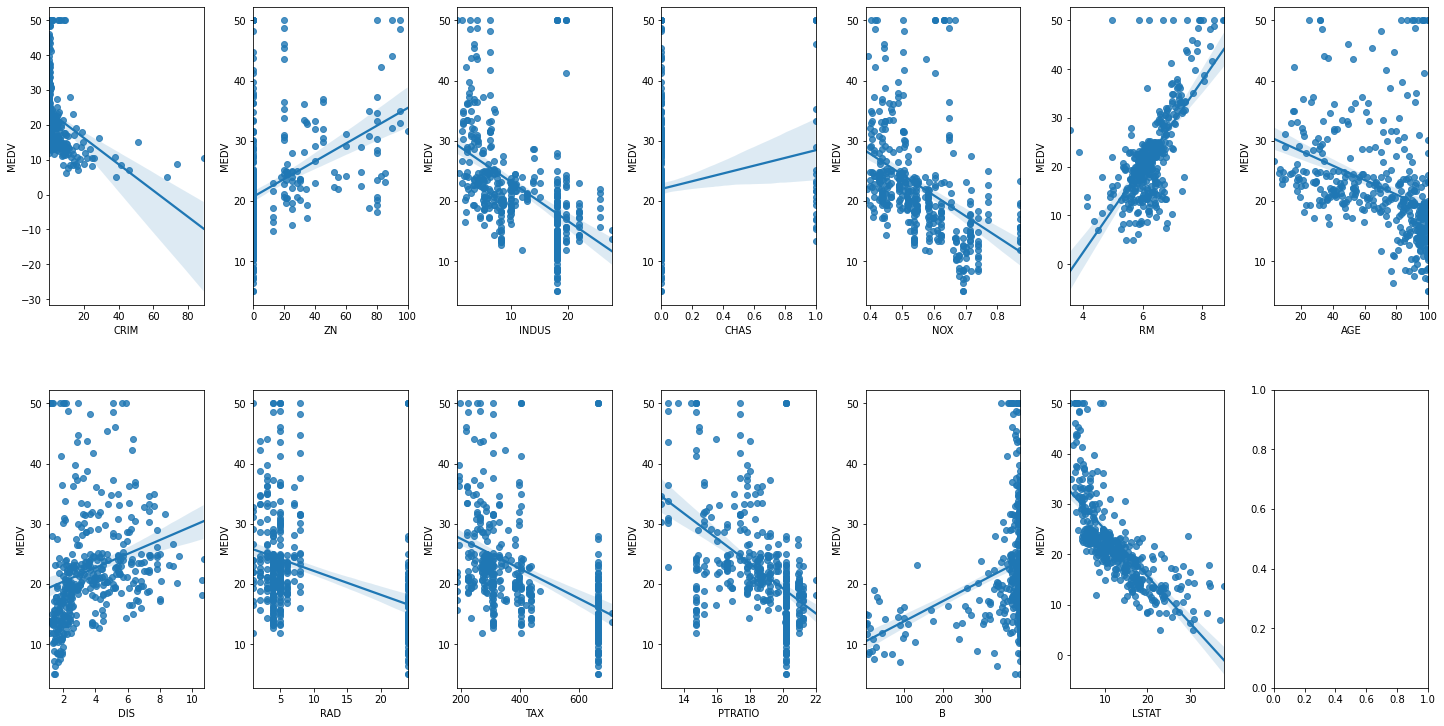

In [152]:
# scatterplot을 통해 13가지 요인이 주택 가격과 어떤 상관 관계가 있는지 살펴본다.
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
x = df1.loc[:,column_sels]
y = df3['MEDV']
x = pd.DataFrame(data= x, columns=column_sels)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Experiments using 'Basic Model + Batch Normalization + Dropout'
기본적인 neural network 에 Dropout 과 Batch Normalization 을 통해 오버피팅을 방지해보자.
- activation function: relu
- optimizer: Adam
- loss function: mean_absolute_error
- batch size: 32
- epoch: 20
- use dropout, rate=0.2
- use batch normalization

In [197]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [198]:
model = models.Sequential()
model.add(layers.Dense(26,activation='relu', input_shape=(13,)))
model.add(layers.Dense(26, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(26, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1)) # 예측(회귀)

In [199]:
model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['accuracy'])

In [200]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size = 32,
                    validation_data=(test_data, test_labels))

Epoch 1/20
13/13 [==============================] - 1s 14ms/step - loss: 21.8977 - accuracy: 0.0000e+00 - val_loss: 17.9296 - val_accuracy: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 21.8279 - accuracy: 0.0000e+00 - val_loss: 18.3251 - val_accuracy: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 21.2836 - accuracy: 0.0000e+00 - val_loss: 19.5448 - val_accuracy: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 20.3600 - accuracy: 0.0000e+00 - val_loss: 20.0482 - val_accuracy: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 18.4888 - accuracy: 0.0000e+00 - val_loss: 20.2273 - val_accuracy: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 18.4469 - accuracy: 0.0000e+00 - val_loss: 19.4069 - val_accuracy: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 16.1584 - accuracy: 0.0000e

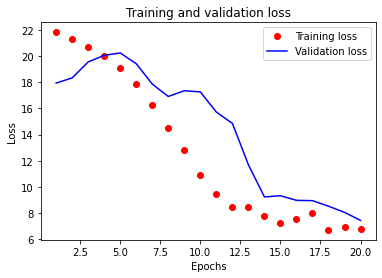

In [201]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Boston Housing Result
이전 basic neural network 를 사용했을 때와 비교하면, 현재 모델의 경우 validation loss 가 기존 모델에 비해 꾸준히 줄어드는 모습을 보였다. 그러나, dropout 과 batch normalization 을 사용하지 않은 기존 모델과 비교했을 때 눈에 띄는 차이는 없었다.